In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score, mean_squared_error

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour

import category_encoders as ce

Using TensorFlow backend.


In [2]:
data_file_name = 'weatherAUS.csv'
full_data_frame = pd.read_csv(data_file_name)

In [3]:
full_data_frame.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [4]:
full_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

## Пропущенные значения

In [5]:
full_data_frame.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

___
### Параметры Sunshine, Evaporation, Cloud3pm, Cloud9am имеют очень много (50-60%) пропущенных значений.
### Отбросим эти параметры. Также отбросим RISK_MM, как указано в описании набора данных.
___

In [6]:
parameter_drop_list = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'RISK_MM', 'Date']
processed_data = full_data_frame.drop(parameter_drop_list, axis=1)

## "Выбросы"

In [7]:
data_header = processed_data.columns.to_list()
data_header

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [8]:
temperature_parameters = [item for item in data_header if 'Temp' in item]
temperature_parameters

['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']

C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


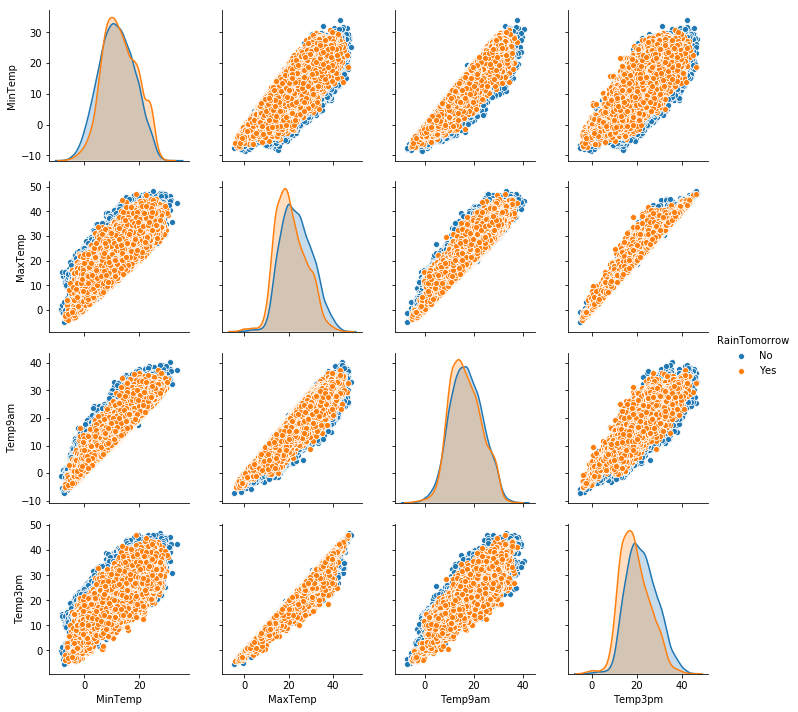

In [9]:
sns.pairplot(data=processed_data, vars=temperature_parameters, hue='RainTomorrow')

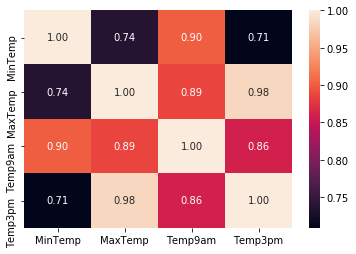

In [10]:
sns.heatmap(data=processed_data[temperature_parameters].corr(),  annot=True, fmt='.2f')

___
### Температурные параметры "выбросов" не имеют.
### Но показали высокую взаимную корреляцию. Учтём в дальнейшем при обработке отсутствующих значений.
___

In [11]:
wind_speed_parameters = [item for item in data_header if 'Wind' in item and 'Speed' in item]
wind_speed_parameters

['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

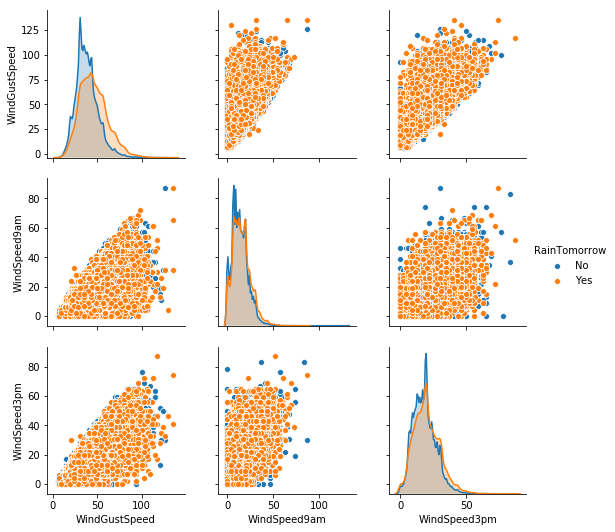

In [12]:
sns.pairplot(data=processed_data, vars=wind_speed_parameters, hue='RainTomorrow')

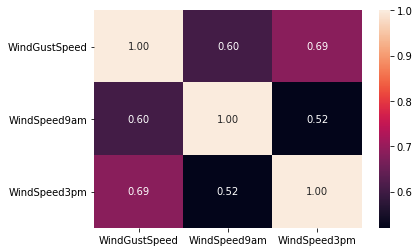

In [13]:
sns.heatmap(data=processed_data[wind_speed_parameters].corr(),  annot=True, fmt='.2f')

### Параметры скорости ветра не сильно коррелированы между собой, но имеют выбросы в области больших значений.

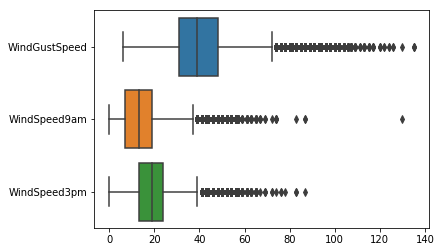

In [14]:
sns.boxplot(data=processed_data[wind_speed_parameters], orient="h")

In [15]:
def outlier_detect_mean_std(data,col,threshold=3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    para = (Upper_fence, Lower_fence)   
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    print('Количество выбросов в данных:',outlier_index.value_counts()[1])
    print('Доля выбросов:',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

### Отбросим значения, отклоняющиеся от среднего более чем на $3\sigma$

In [16]:
index,para = outlier_detect_mean_std(data=processed_data, col='WindGustSpeed',threshold=3)
print('Верхняя граница:',para[0],'\nНижняя граница:',para[1])

Количество выбросов в данных: 1331
Доля выбросов: 0.009360517043736331
Верхняя граница: 80.75069395403958 
Нижняя граница: -0.7821106388871897


In [17]:
processed_data=processed_data[~index]

In [18]:
index,para = outlier_detect_mean_std(data=processed_data, col='WindSpeed9am',threshold=3)
print('Верхняя граница:',para[0],'\nНижняя граница:',para[1])

Количество выбросов в данных: 1005
Доля выбросов: 0.007134642415981599
Верхняя граница: 39.94675885835112 
Нижняя граница: -12.237092999203455


In [19]:
processed_data=processed_data[~index]

In [20]:
index,para = outlier_detect_mean_std(data=processed_data, col='WindSpeed3pm',threshold=3)
print('Верхняя граница:',para[0],'\nНижняя граница:',para[1])

Количество выбросов в данных: 712
Доля выбросов: 0.005090914291025834
Верхняя граница: 43.74341447920969 
Нижняя граница: -7.023394664823858


In [21]:
processed_data=processed_data[~index]

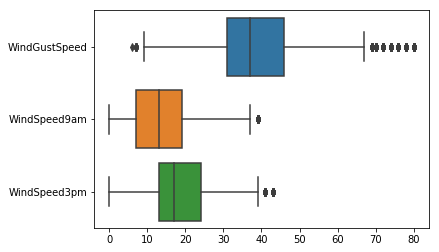

In [22]:
sns.boxplot(data=processed_data[wind_speed_parameters], orient="h")

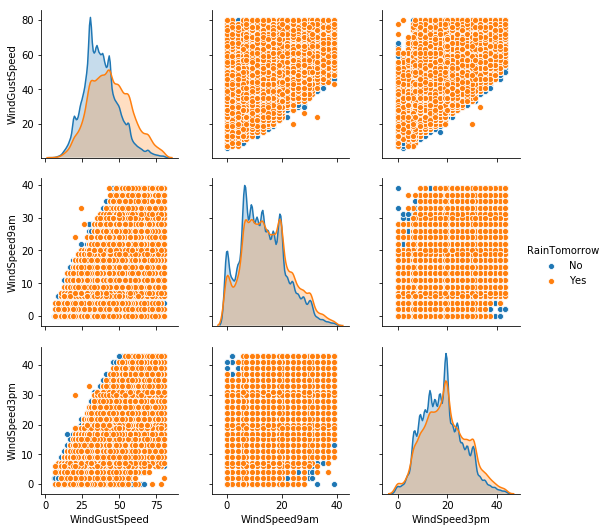

In [23]:
sns.pairplot(data=processed_data, vars=wind_speed_parameters, hue='RainTomorrow')

In [24]:
wind_direction_parameters = [item for item in data_header if 'Wind' in item and 'Dir' in item]
wind_direction_parameters

['WindGustDir', 'WindDir9am', 'WindDir3pm']

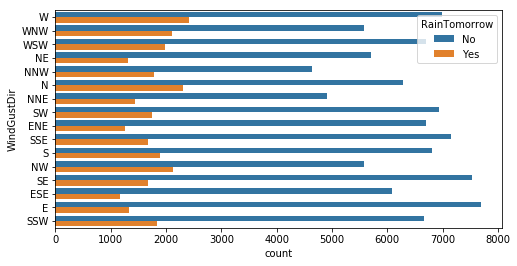

In [25]:
plt.subplots(figsize=(8,4))
sns.countplot(y='WindGustDir', hue='RainTomorrow', data=processed_data)

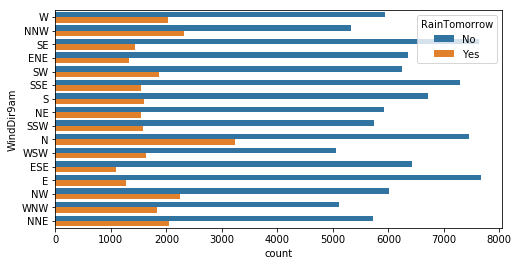

In [26]:
plt.subplots(figsize=(8,4))
sns.countplot(y='WindDir9am', hue='RainTomorrow', data=processed_data)

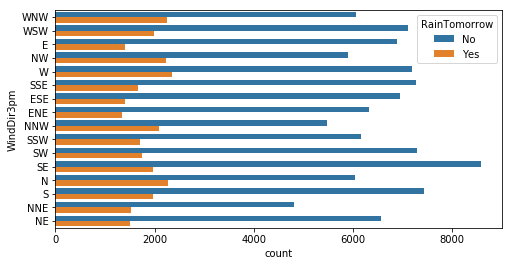

In [27]:
plt.subplots(figsize=(8,4))
sns.countplot(y='WindDir3pm', hue='RainTomorrow', data=processed_data)

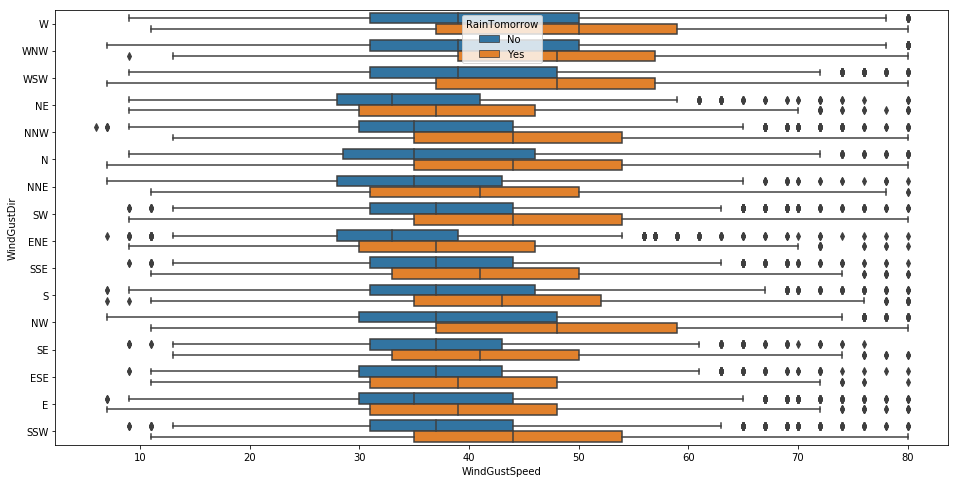

In [28]:
plt.subplots(figsize=(16,8))
sns.boxplot(y='WindGustDir', x='WindGustSpeed', data=processed_data, hue='RainTomorrow')

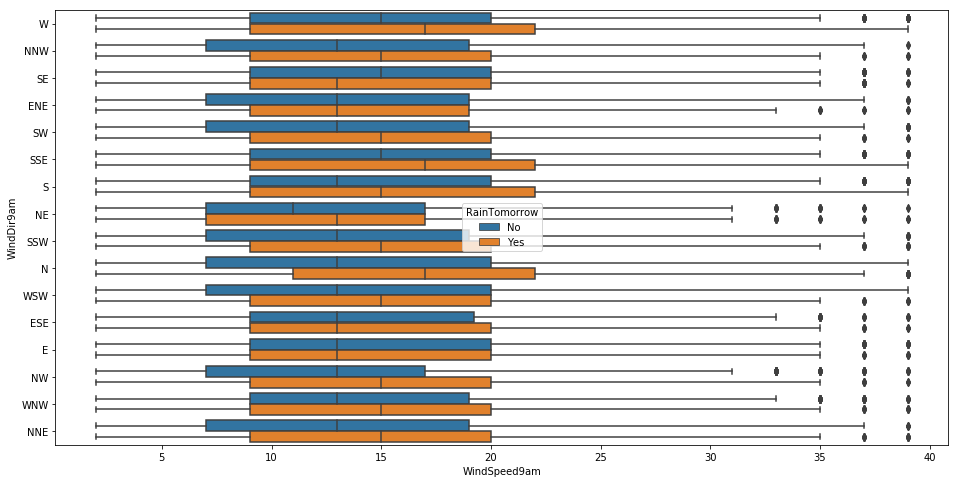

In [29]:
plt.subplots(figsize=(16,8))
sns.boxplot(y='WindDir9am', x='WindSpeed9am', data=processed_data, hue='RainTomorrow')

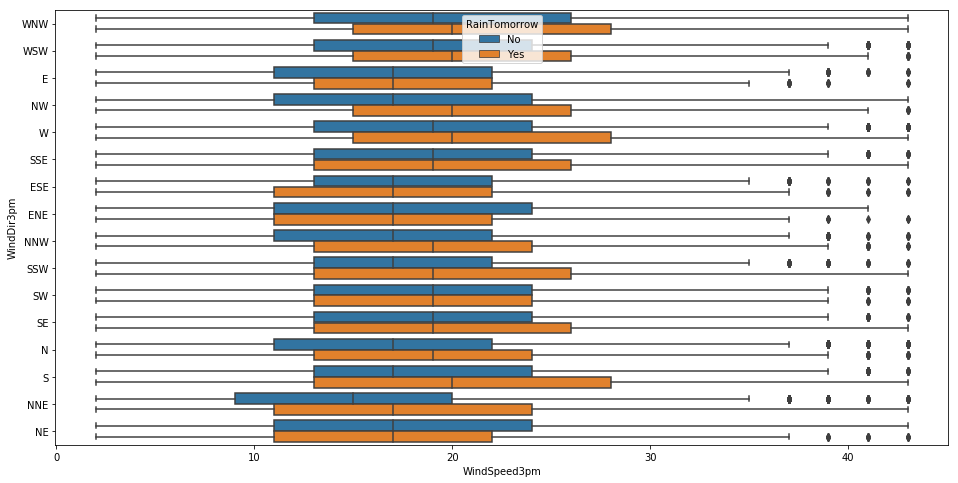

In [30]:
plt.subplots(figsize=(16,8))
sns.boxplot(y='WindDir3pm', x='WindSpeed3pm', data=processed_data, hue='RainTomorrow')

### Из трёх пар переменных WindDir-WindSpeed только WindGustDir-WindGustSpeed показывает существенные различия для разных значений целевой переменной RainTomorrow. Возможно остальные две пары можно будет отбросить.

In [31]:
pressure_parameters = [item for item in data_header if 'Pressure' in item]
pressure_parameters

['Pressure9am', 'Pressure3pm']

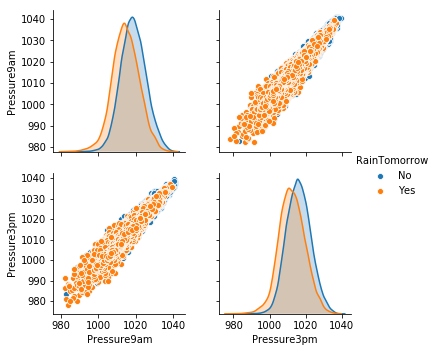

In [32]:
sns.pairplot(data=processed_data, vars=pressure_parameters, hue='RainTomorrow')

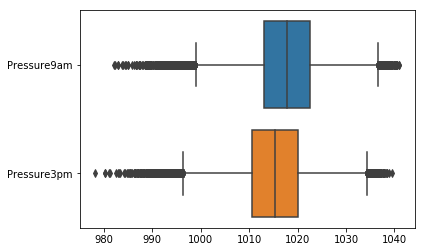

In [33]:
sns.boxplot(data=processed_data[pressure_parameters], orient="h")

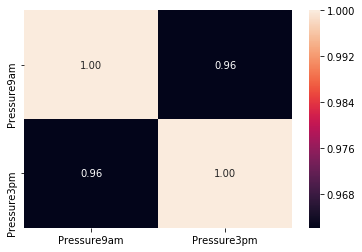

In [34]:
sns.heatmap(data=processed_data[pressure_parameters].corr(),  annot=True, fmt='.2f')

### Параметры, связанные с давлением очень сильно коррелированы и имеют выбросы в области маленьких значений. Оставим только один параметр Pressure3pm и отбросим очень маленькие значения.

In [35]:
processed_data= processed_data.drop('Pressure9am', axis=1)
index,para = outlier_detect_mean_std(data=processed_data, col='Pressure3pm',threshold=3)
print('Верхняя граница:',para[0],'\nНижняя граница:',para[1])

Количество выбросов в данных: 362
Доля выбросов: 0.0026016026447231305
Верхняя граница: 1036.2423883249548 
Нижняя граница: 994.5585383226536


In [36]:
processed_data=processed_data[~index]

In [37]:
humidity_parameters = [item for item in data_header if 'Humidity' in item]
humidity_parameters

['Humidity9am', 'Humidity3pm']

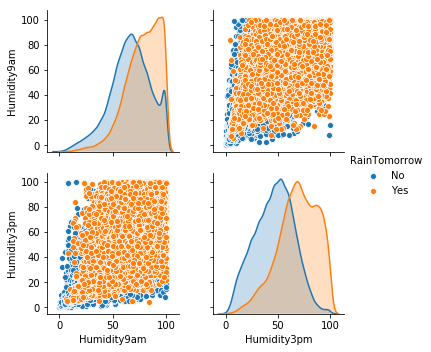

In [38]:
sns.pairplot(data=processed_data, vars=humidity_parameters, hue='RainTomorrow')

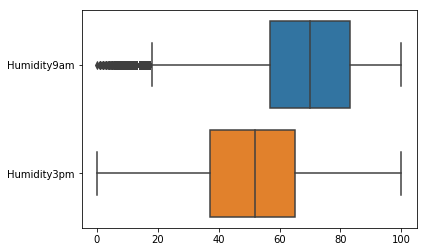

In [39]:
sns.boxplot(data=processed_data[humidity_parameters], orient="h")

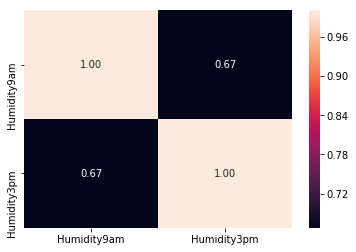

In [40]:
sns.heatmap(data=processed_data[humidity_parameters].corr(),  annot=True, fmt='.2f')

In [41]:
index,para = outlier_detect_mean_std(data=processed_data, col='Humidity9am',threshold=3)
print('Верхняя граница:',para[0],'\nНижняя граница:',para[1])

Количество выбросов в данных: 456
Доля выбросов: 0.003285705021508398
Верхняя граница: 125.95058196272637 
Нижняя граница: 11.943829198896793


In [42]:
processed_data=processed_data[~index]

### Параметры, связанные с влажностью, не имеют значительной корреляции, количество выбросов незначительно.
### Видно, что перед дождливами днями, влажность выше, чем перед сухими.

[(-1, 35)]

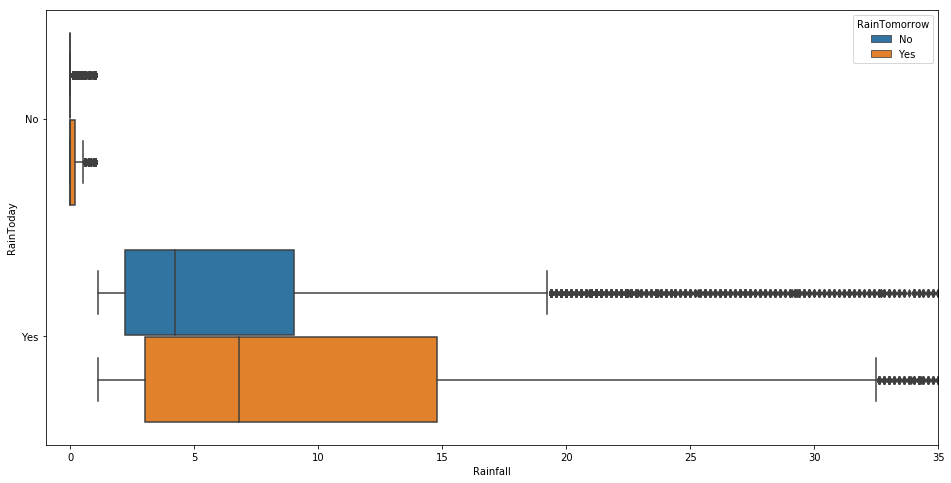

In [43]:
plt.subplots(figsize=(16,8))
g=sns.boxplot(x='Rainfall', y='RainToday', data=processed_data, hue='RainTomorrow', orient="h")
g.set(xlim=(-1, 35))

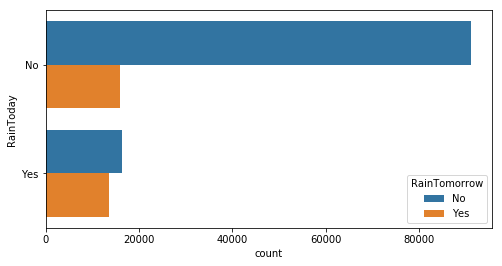

In [44]:
plt.subplots(figsize=(8,4))
sns.countplot(y='RainToday', hue='RainTomorrow', data=processed_data)

[(-1, 35)]

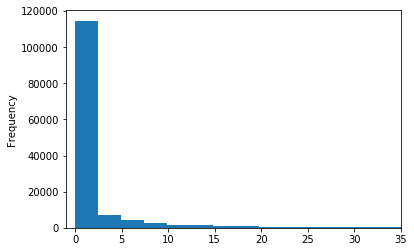

In [45]:
g = processed_data['Rainfall'].plot.hist(bins=150)
g.set(xlim=(-1, 35))

In [46]:
processed_data['RainToday'].value_counts()

No     106860
Yes     30105
Name: RainToday, dtype: int64

In [47]:
processed_data['RainTomorrow'].value_counts()

No     108131
Yes     30196
Name: RainTomorrow, dtype: int64

### Количество дней, когда дождя не было или выпало очень мало осадков намного больше количества дней, когда выпало значительное количество осадков.
### При этом, параметр Rainfall намного информативнее, чем RainToday: 1) наблюдается различие средних значений количества осадков в дни, после которых дождь был и после которых дождей не было, 2) хотя соотношение количества дождливых и сухих дней практическо одинаково для текущей (RainToday) и следующей дат (RainTomorrow), не наблюдается связь RainToday-RainTomorrow, т.к. дней признаком RainTomorrow почти поровну средни дней с признаком RainToday (дождливых дней) и среди дней  без этого признака (сухих дней).
### Величину количества осадков предлагается прологарифмировать. При этом предварительно приравнять 1 все значения, меньшие 1, так, чтобы после логарфмирования они обратились в 0. Смысл параметра при этом не изменится: если осадков не было или было очень мало, он равен нулю.

In [48]:
processed_data['Rainfall'] = processed_data['Rainfall'].apply(lambda x: 0 if x < 1 else np.log(x));

C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


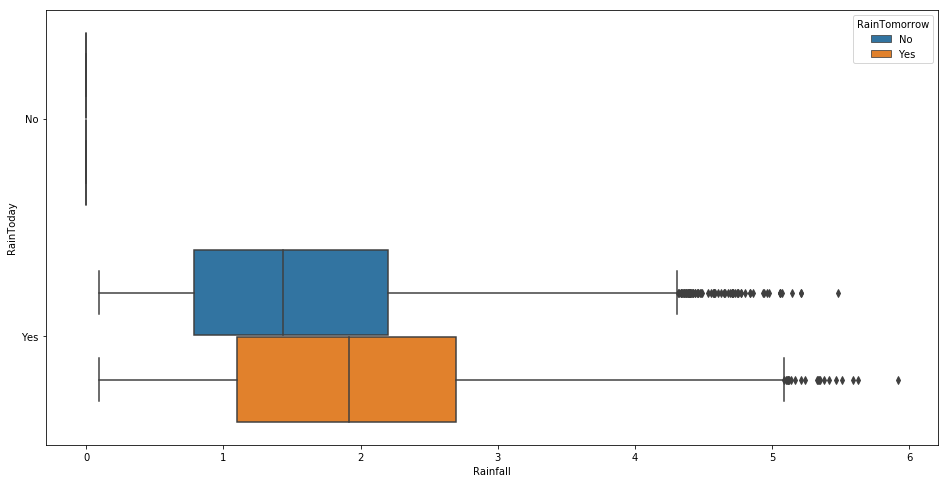

In [49]:
plt.subplots(figsize=(16,8))
g=sns.boxplot(x='Rainfall', y='RainToday', data=processed_data, hue='RainTomorrow', orient="h")

In [50]:
processed_data.count().sort_values()

Pressure3pm      124584
WindDir9am       128368
WindGustDir      129234
WindGustSpeed    129293
WindDir3pm       134606
Humidity3pm      134797
Temp3pm          135662
WindSpeed3pm     135748
Humidity9am      136585
Rainfall         136965
RainToday        136965
WindSpeed9am     136994
Temp9am          137440
MinTemp          137700
MaxTemp          138007
Location         138327
RainTomorrow     138327
dtype: int64

### Среди параметров с пропущенными значениями есть те, которые предполагалось отбросить из-за неинформативности: WindDir9am, WindSpeed9am, WindDir3pm, WindDir3pm.
### Остальные пропущенные значения заполним медианными значениями для численных параметров и модой для категориальных.

In [51]:
parameter_drop_list = ['WindDir9am', 'WindSpeed9am', 'WindDir3pm', 'WindDir3pm']
processed_data = processed_data.drop(parameter_drop_list, axis=1)

In [52]:
processed_data.fillna(processed_data.median(), inplace=True)
processed_data['RainToday'] = processed_data.fillna(processed_data.mode()['RainToday'][0])['RainToday']
processed_data['WindGustDir'] = processed_data.fillna(processed_data.mode()['WindGustDir'][0])['WindGustDir']

In [53]:
processed_data.count().sort_values()

Location         138327
MinTemp          138327
MaxTemp          138327
Rainfall         138327
WindGustDir      138327
WindGustSpeed    138327
WindSpeed3pm     138327
Humidity9am      138327
Humidity3pm      138327
Pressure3pm      138327
Temp9am          138327
Temp3pm          138327
RainToday        138327
RainTomorrow     138327
dtype: int64

## Масштабирование численных параметров

In [54]:
scaled_data = processed_data.copy(deep=True).drop('Location', axis=1)

### Все численные параметры, кроме Rainfall, отмасштабируем так, чтобы среднее значение стало равно 0, а дисперсия 1.

In [55]:
scaler = StandardScaler()
scaled_data.columns.to_list()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [56]:
scalable_params = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm',
                   'WindGustSpeed', 'WindSpeed3pm',
                   'Humidity9am', 'Humidity3pm',
                   'Pressure3pm']
scaled_data[scalable_params] = scaler.fit_transform(scaled_data[scalable_params])

In [57]:
scaled_data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,Temp3pm
count,1.383270e+05,1.383270e+05,138327.000000,1.383270e+05,1.383270e+05,1.383270e+05,1.383270e+05,1.383270e+05,1.383270e+05,1.383270e+05
mean,-1.418608e-15,5.066139e-17,0.375504,-1.068121e-14,1.305572e-14,1.475627e-14,-8.169412e-15,2.532020e-14,1.006599e-15,-1.472876e-15
std,1.000004e+00,1.000004e+00,0.856795,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-3.226262e+00,-3.976952e+00,0.000000,-2.765522e+00,-2.234298e+00,-3.075029e+00,-2.487160e+00,-3.215893e+00,-3.748638e+00,-3.980195e+00
25%,-7.113593e-01,-7.409253e-01,0.000000,-6.671378e-01,-6.358189e-01,-6.541775e-01,-7.156126e-01,-6.417926e-01,-7.218355e-01,-7.178944e-01
50%,-2.405666e-02,-7.384973e-02,0.000000,-1.635255e-01,-1.439791e-01,4.517963e-02,2.253205e-02,-9.827892e-03,-3.886458e-02,-7.131222e-02
75%,7.257280e-01,7.067707e-01,0.000000,5.918928e-01,7.167406e-01,7.445367e-01,6.622574e-01,6.221369e-01,7.061946e-01,6.781353e-01
max,3.396836e+00,3.417652e+00,5.916202,3.445696e+00,3.052980e+00,1.659081e+00,2.384595e+00,3.196237e+00,3.484644e+00,3.675926e+00


## Кодирование категориальных параметров

### В наборе есть два индикаторных параметра: RainToday и RainTomorrow. Для их кодирования заменим Yes на 1, No - на 0.

In [58]:
scaled_data['RainToday'] = scaled_data['RainToday'].apply(lambda x: 0 if x == 'No' else 1);
scaled_data['RainTomorrow'] = scaled_data['RainTomorrow'].apply(lambda x: 0 if x == 'No' else 1);

### Для направления ветра WindGustDir используем one-hot кодирование.

In [59]:
scaled_data = pd.get_dummies(scaled_data, drop_first=True)

In [60]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138327 entries, 0 to 142192
Data columns (total 27 columns):
MinTemp            138327 non-null float64
MaxTemp            138327 non-null float64
Rainfall           138327 non-null float64
WindGustSpeed      138327 non-null float64
WindSpeed3pm       138327 non-null float64
Humidity9am        138327 non-null float64
Humidity3pm        138327 non-null float64
Pressure3pm        138327 non-null float64
Temp9am            138327 non-null float64
Temp3pm            138327 non-null float64
RainToday          138327 non-null int64
RainTomorrow       138327 non-null int64
WindGustDir_ENE    138327 non-null uint8
WindGustDir_ESE    138327 non-null uint8
WindGustDir_N      138327 non-null uint8
WindGustDir_NE     138327 non-null uint8
WindGustDir_NNE    138327 non-null uint8
WindGustDir_NNW    138327 non-null uint8
WindGustDir_NW     138327 non-null uint8
WindGustDir_S      138327 non-null uint8
WindGustDir_SE     138327 non-null uint8
WindGust

## Оценка важности и отбор параметров

In [61]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [62]:
X = scaled_data.loc[:,scaled_data.columns!='RainTomorrow']
y = scaled_data['RainTomorrow']

In [63]:
feature_selector = SelectKBest(f_classif, k=5)
feature_selector.fit(X, y)

SelectKBest(k=5, score_func=<function f_classif at 0x00000068C77B8158>)

In [64]:
print(X.columns[feature_selector.get_support(indices=True)])

Index(['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'RainToday'], dtype='object')


In [65]:
feature_selector = SelectKBest(mutual_info_classif, k=5)
feature_selector.fit(X, y)

SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x00000068C77BAE18>)

In [66]:
print(X.columns[feature_selector.get_support(indices=True)])

Index(['Rainfall', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'RainToday'], dtype='object')


In [67]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=1812)

In [68]:
forest_classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1812,
                       verbose=0, warm_start=False)

In [69]:
importances = list(zip(forest_classifier.feature_importances_, X.columns))
importances.sort(reverse=True)
print(*importances, sep='\n')

(0.30961600396836747, 'Humidity3pm')
(0.24414408964520792, 'Rainfall')
(0.12539903136548428, 'Humidity9am')
(0.12239253161344107, 'RainToday')
(0.0534516306169389, 'WindGustSpeed')
(0.04246406088694624, 'Pressure3pm')
(0.03805729899154617, 'Temp3pm')
(0.031082251594170652, 'MaxTemp')
(0.024046580612655834, 'MinTemp')
(0.0035221465270573057, 'WindSpeed3pm')
(0.0018731004439132349, 'Temp9am')
(0.001019727535911073, 'WindGustDir_ESE')
(0.0009045472736730611, 'WindGustDir_W')
(0.0007195220417431579, 'WindGustDir_WNW')
(0.0005276321515229323, 'WindGustDir_N')
(0.00023693478506670937, 'WindGustDir_ENE')
(0.00019249054801542148, 'WindGustDir_NNW')
(0.00013015133029316156, 'WindGustDir_SE')
(0.00012436468997643207, 'WindGustDir_NW')
(4.294036584189709e-05, 'WindGustDir_SSW')
(4.2643484832728216e-05, 'WindGustDir_SSE')
(1.0319527394368044e-05, 'WindGustDir_NE')
(0.0, 'WindGustDir_WSW')
(0.0, 'WindGustDir_SW')
(0.0, 'WindGustDir_S')
(0.0, 'WindGustDir_NNE')


### Разные тесты показали схожие результаты: 4 наиболее важных параметра для классификации - это Rainfall, Humidity9am, Humidity3pm и RainToday. Смысл этих параметров - влажность воздуха и количество выпавших осадков, чем эти значения больше, тем вероятнее осадки на следующий день.
### Параметрами, определяющими направление ветра можно пренебречь.

In [70]:
selected_features = [feature for feature in X.columns if 'WindGustDir' not in feature]
selected_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [71]:
X = scaled_data.loc[:,selected_features]
y = scaled_data['RainTomorrow']

In [72]:
X.shape

(138327, 11)

In [73]:
y.shape

(138327,)

## Разделение на обучающую и тестовую выборку

### <font color=red> Алгоритм SVM имеет высокую вычислительную сложность. </font>
![complexity](SVM_complexity.png)
### Для сокращения времени вычислений для обучения будем использовать лишь часть данных.

In [74]:
X_main, X_part, y_main, y_part = train_test_split(X, y, test_size=0.5, random_state=1812, stratify=y)

In [75]:
X_part.shape

(69164, 11)

In [76]:
y_part.shape

(69164,)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y_part, test_size=0.3, random_state=2019, stratify=y_part)

In [78]:
y_train.value_counts(normalize=True)

0    0.781716
1    0.218284
Name: RainTomorrow, dtype: float64

In [79]:
y_test.value_counts(normalize=True)

0    0.781687
1    0.218313
Name: RainTomorrow, dtype: float64

### Поскольку велик дисбаланс количества положительных и отрицательных примеров (1:4), сохраним это соотношение и в тестовой и обучающей выборках.

## Классификация методом опорных векторов

In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [81]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(actual, prob_prediction)
    auc_score = roc_auc_score(actual, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [83]:
svc_lin = SVC(kernel='linear', C=1, probability=True)
svc_rbf = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svc_poly = SVC(kernel='poly', C=1, degree=3, gamma='scale', probability=True)
svc_sigmoid = SVC(kernel='sigmoid', C=1, gamma='scale', probability=True)

svc_lin.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)
svc_poly.fit(X_train, y_train)
svc_sigmoid.fit(X_train, y_train)

y_lin_proba = svc_lin.predict_proba(X_test)
y_rbf_proba = svc_rbf.predict_proba(X_test)
y_poly_proba = svc_poly.predict_proba(X_test)
y_sigmoid_proba = svc_sigmoid.predict_proba(X_test)

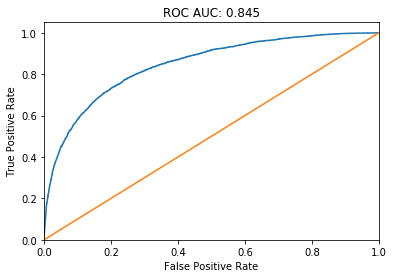

In [84]:
plot_roc_curve(y_lin_proba[:, 1], y_test)

In [85]:
quality_report(svc_lin.predict(X_test), y_test)

Accuracy: 0.839
Precision: 0.409
Recall: 0.734
f1_score: 0.526


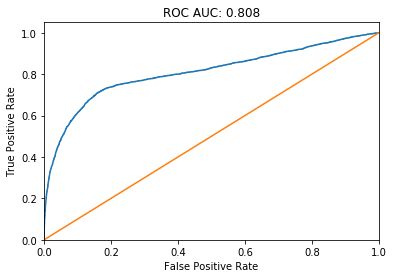

In [86]:
plot_roc_curve(y_rbf_proba[:, 1], y_test)

In [87]:
quality_report(svc_rbf.predict(X_test), y_test)

Accuracy: 0.845
Precision: 0.406
Recall: 0.775
f1_score: 0.533


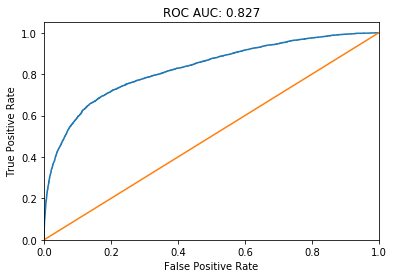

In [88]:
plot_roc_curve(y_poly_proba[:, 1], y_test)

In [89]:
quality_report(svc_poly.predict(X_test), y_test)

Accuracy: 0.840
Precision: 0.367
Recall: 0.789
f1_score: 0.501


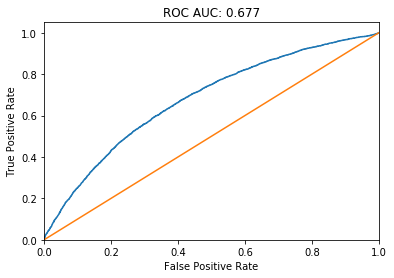

In [90]:
plot_roc_curve(y_sigmoid_proba[:, 1], y_test)

In [91]:
quality_report(svc_sigmoid.predict(X_test), y_test)

Accuracy: 0.732
Precision: 0.376
Recall: 0.383
f1_score: 0.379


### Сравним метрики SVM и RandomForest

In [92]:
y_forest_proba = forest_classifier.fit(X_train, y_train).predict_proba(X_test)

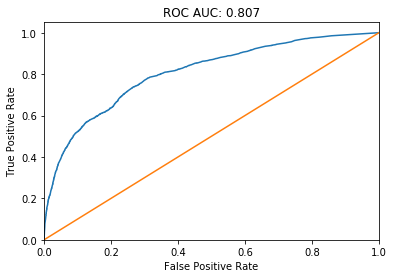

In [93]:
plot_roc_curve(y_forest_proba[:, 1], y_test)

In [94]:
quality_report(forest_classifier.predict(X_test), y_test)

Accuracy: 0.815
Precision: 0.216
Recall: 0.776
f1_score: 0.338


### Из использованных моделей лучшую точность (accuracy) предсказания 84.5% показал алгритм SVM c ядром rbf.
</br>

---
## Обучение на более полном наборе данных
---

### При подготовке данных мы отбросили часть параметров, имевших много пропущенных значений.
### Однако, потом отбросили половину записей для сокращеня времени вычислений.
### Сравним результаты обучения на более полных данных: используем ранее отброшенные параметры, а для сокращения времени вычислений сключим из набора все неполные записи.

In [95]:
full_data_frame = pd.read_csv(data_file_name)
parameter_drop_list = ['Location', 'RISK_MM', 'Date']
processed_data = full_data_frame.drop(parameter_drop_list, axis=1)
processed_data = processed_data.dropna()
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 5939 to 139112
Data columns (total 21 columns):
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null float64
WindDir9am       56420 non-null object
WindDir3pm       56420 non-null object
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null object
RainTomorrow     56420 non-null object
dtypes: float64(16), object(5)
memory usage: 9.5+ MB

### Теперь объём набора данных сравним с тем, который использовался ранее. Но количество параметров увеличилось.
### Подготовим данные для обучения модели: отмасштабируем численные параметры, перекодируем категориальные. 

In [96]:
processed_data['Rainfall'] = processed_data['Rainfall'].apply(lambda x: 0 if x < 1 else np.log(x));

In [97]:
scaled_data = processed_data.copy(deep=True)

In [98]:
scaled_data.columns.to_list()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [99]:
scalable_params = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm',
                   'Evaporation',
                   'Sunshine',
                   'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                   'Humidity9am', 'Humidity3pm',
                   'Pressure9am', 'Pressure3pm',
                   'Cloud9am', 'Cloud3pm']

scaled_data[scalable_params] = scaler.fit_transform(scaled_data[scalable_params])

In [100]:
scaled_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,5.642000e+04,5.642000e+04,56420.000000,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04
mean,-2.987476e-15,1.038305e-15,0.375415,-2.374963e-15,5.808875e-16,-1.100109e-15,-4.031930e-16,2.601275e-15,4.438008e-15,-4.055994e-16,3.893095e-15,2.671301e-14,-5.683043e-15,7.868972e-15,1.779781e-15,1.495401e-15
std,1.000009e+00,1.000009e+00,0.847119,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-3.142579e+00,-2.886289e+00,0.000000,-1.488843e+00,-2.058376e+00,-2.390483e+00,-1.643302e+00,-2.090077e+00,-3.558239e+00,-2.455925e+00,-5.317403e+00,-5.486320e+00,-1.516445e+00,-1.634357e+00,-2.878373e+00,-2.780718e+00
25%,-7.581500e-01,-7.917818e-01,0.000000,-7.313184e-01,-7.279240e-01,-7.407036e-01,-8.016452e-01,-7.974964e-01,-5.873737e-01,-7.229829e-01,-6.570142e-01,-6.834078e-01,-1.158937e+00,-8.788497e-01,-7.772553e-01,-7.767640e-01
50%,-4.126302e-02,-4.579309e-02,0.000000,-1.361205e-01,2.300018e-01,-1.407837e-01,-8.022526e-02,-9.245218e-02,6.081509e-02,1.970677e-02,-5.717731e-03,-1.391092e-02,2.710968e-01,2.544113e-01,-6.165730e-02,-4.539370e-02
75%,7.691310e-01,7.862713e-01,0.000000,5.131863e-01,7.887918e-01,5.341262e-01,5.209580e-01,7.300994e-01,7.090039e-01,6.633712e-01,6.600520e-01,6.701403e-01,9.861134e-01,1.009919e+00,7.757447e-01,7.591136e-01
max,2.795116e+00,3.425924e+00,5.328847,2.047937e+01,1.799936e+00,6.233365e+00,6.172081e+00,6.605467e+00,1.843334e+00,2.495339e+00,3.352078e+00,3.508225e+00,1.343622e+00,1.765426e+00,3.227049e+00,3.421301e+00


In [101]:
scaled_data['RainToday'] = scaled_data['RainToday'].apply(lambda x: 0 if x == 'No' else 1);
scaled_data['RainTomorrow'] = scaled_data['RainTomorrow'].apply(lambda x: 0 if x == 'No' else 1);

In [102]:
scaled_data = pd.get_dummies(scaled_data, drop_first=True)
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 5939 to 139112
Data columns (total 63 columns):
MinTemp            56420 non-null float64
MaxTemp            56420 non-null float64
Rainfall           56420 non-null float64
Evaporation        56420 non-null float64
Sunshine           56420 non-null float64
WindGustSpeed      56420 non-null float64
WindSpeed9am       56420 non-null float64
WindSpeed3pm       56420 non-null float64
Humidity9am        56420 non-null float64
Humidity3pm        56420 non-null float64
Pressure9am        56420 non-null float64
Pressure3pm        56420 non-null float64
Cloud9am           56420 non-null float64
Cloud3pm           56420 non-null float64
Temp9am            56420 non-null float64
Temp3pm            56420 non-null float64
RainToday          56420 non-null int64
RainTomorrow       56420 non-null int64
WindGustDir_ENE    56420 non-null uint8
WindGustDir_ESE    56420 non-null uint8
WindGustDir_N      56420 non-null uint8
WindGustDir_NE 

In [105]:
X = scaled_data.loc[:,scaled_data.columns!='RainTomorrow']
y = scaled_data['RainTomorrow']

In [106]:
forest_classifier.fit(X, y)
importances = list(zip(forest_classifier.feature_importances_, X.columns))
importances.sort(reverse=True)
print(*importances, sep='\n')

(0.1914255130645723, 'Humidity3pm')
(0.13130943157544958, 'Sunshine')
(0.11723443346303361, 'Cloud3pm')
(0.09902452089531906, 'Cloud9am')
(0.09738926547602382, 'RainToday')
(0.09709598940843628, 'Rainfall')
(0.06978293812836295, 'Humidity9am')
(0.06751016894682169, 'Pressure9am')
(0.03733617279171526, 'WindGustSpeed')
(0.024338375502738582, 'Pressure3pm')
(0.01865215292880143, 'Temp3pm')
(0.007180452797118535, 'MinTemp')
(0.006418859300889146, 'MaxTemp')
(0.006344595386874974, 'WindSpeed9am')
(0.004801596712928619, 'WindSpeed3pm')
(0.004715436929831415, 'Evaporation')
(0.003791390349182734, 'WindDir3pm_WNW')
(0.0037133026490611177, 'WindGustDir_WNW')
(0.003280069086886683, 'WindDir3pm_ENE')
(0.0027811456246927212, 'WindDir9am_NNW')
(0.002223849616769389, 'WindDir9am_SE')
(0.0012755519554375505, 'WindDir9am_N')
(0.0008883585933797179, 'WindDir9am_NNE')
(0.0003930394812900409, 'WindGustDir_ENE')
(0.0002384915563379062, 'WindGustDir_N')
(0.0001629524911366658, 'WindGustDir_SSW')
(0.000160

### Смело отбрасываем параметры, определяющие направление ветра.

In [109]:
selected_features = [feature for feature in X.columns if 'WindDir' not in feature and 'GustDir' not in feature ]
selected_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [111]:
X = scaled_data.loc[:,selected_features]
y = scaled_data['RainTomorrow']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019, stratify=y)

In [113]:
svc_lin = SVC(kernel='linear', C=1, probability=True)
svc_rbf = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svc_poly = SVC(kernel='poly', C=1, degree=3, gamma='scale', probability=True)
svc_sigmoid = SVC(kernel='sigmoid', C=1, gamma='scale', probability=True)

svc_lin.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)
svc_poly.fit(X_train, y_train)
svc_sigmoid.fit(X_train, y_train)

y_lin_proba = svc_lin.predict_proba(X_test)
y_rbf_proba = svc_rbf.predict_proba(X_test)
y_poly_proba = svc_poly.predict_proba(X_test)
y_sigmoid_proba = svc_sigmoid.predict_proba(X_test)

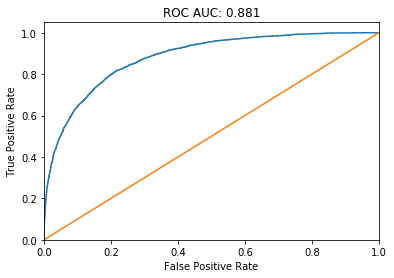

In [114]:
plot_roc_curve(y_lin_proba[:, 1], y_test)

In [115]:
quality_report(svc_lin.predict(X_test), y_test)

Accuracy: 0.852
Precision: 0.498
Recall: 0.746
f1_score: 0.598


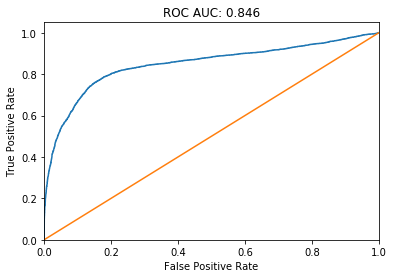

In [116]:
plot_roc_curve(y_rbf_proba[:, 1], y_test)

In [117]:
quality_report(svc_rbf.predict(X_test), y_test)

Accuracy: 0.857
Precision: 0.490
Recall: 0.780
f1_score: 0.602


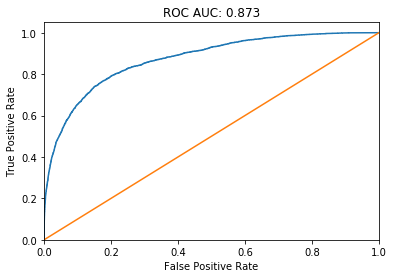

In [118]:
plot_roc_curve(y_poly_proba[:, 1], y_test)

In [119]:
quality_report(svc_poly.predict(X_test), y_test)

Accuracy: 0.852
Precision: 0.433
Recall: 0.803
f1_score: 0.562


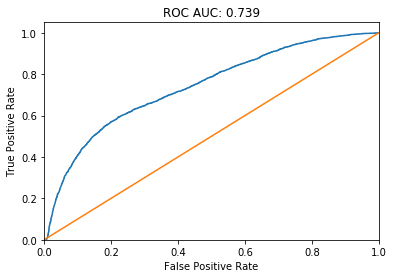

In [120]:
plot_roc_curve(y_sigmoid_proba[:, 1], y_test)

In [121]:
quality_report(svc_sigmoid.predict(X_test), y_test)

Accuracy: 0.776
Precision: 0.498
Recall: 0.492
f1_score: 0.495


In [122]:
y_forest_proba = forest_classifier.fit(X_train, y_train).predict_proba(X_test)

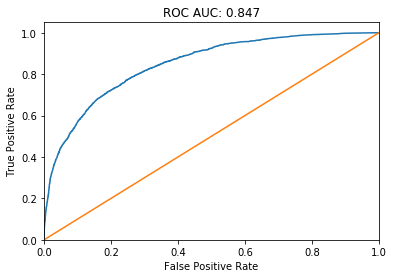

In [123]:
plot_roc_curve(y_forest_proba[:, 1], y_test)

In [124]:
quality_report(forest_classifier.predict(X_test), y_test)

Accuracy: 0.828
Precision: 0.278
Recall: 0.820
f1_score: 0.416


### За счёт дополнительных параметров удалось немного (на 1,2% до 85,7%) повысить точность (accuracy) предсказания. При этом важно, что количества положительных и отрицательных примеров соотносятся как 1:4.

### <font color=red>Хотя и удалось поднять precision c 0,406 до 0,498, сама по себе величина говорит о низком качестве модели.</font>

### Лучший результат, по-прежнему, показал SVM с ядром rbf